In [1]:
import numpy as np
import pandas as pd

In [2]:
d_f = pd.read_csv('Book-01.csv')

In [3]:
df = d_f[['CF_age band','Education Field','Marital Status','Job Role','CF_attrition count']]

In [4]:
# import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [5]:
# preporcessing --> encoding 
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'Category':
        df[col] = LabelEncoder().fit_transform(df[col])

C:\Users\Bilawal\AppData\Local\Temp\ipykernel_12664\3265882284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
C:\Users\Bilawal\AppData\Local\Temp\ipykernel_12664\3265882284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
C:\Users\Bilawal\AppData\Local\Temp\ipykernel_12664\3265882284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [6]:
df.head()

,CF_age band,Education Field,Marital Status,Job Role,CF_attrition count
0,1,1,2,7,1
1,2,1,1,6,0
2,1,4,2,2,1
3,0,1,1,6,0
4,0,3,1,2,0


In [7]:
# standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

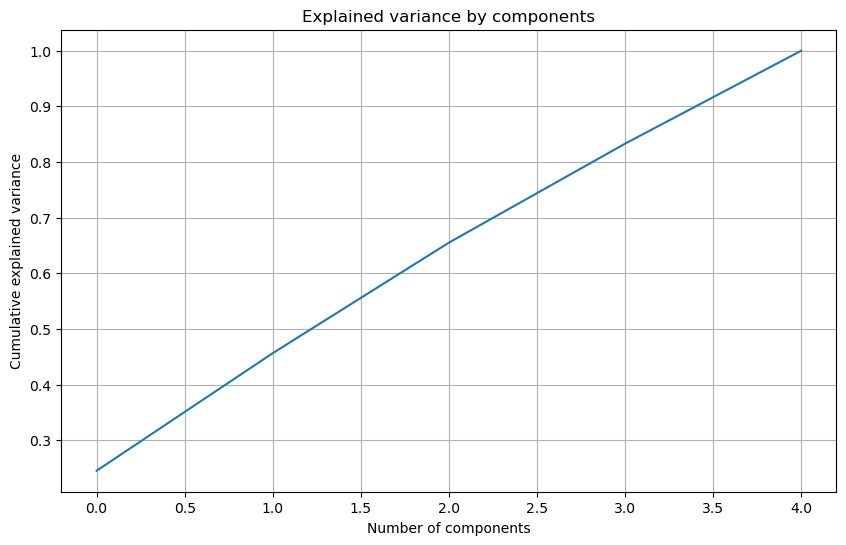

In [8]:
# apply PCA

pca = PCA()
X_pca = pca.fit_transform(df_scaled)

# plot the explained variance ratio
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by components')
plt.grid(True)
plt.show()

In [9]:
# Create a DataFrame to show the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=df.columns)
print(loadings)

                         PC1       PC2       PC3       PC4       PC5
CF_age band         0.270920  0.717525 -0.120299  0.610641 -0.156223
Education Field     0.178060  0.249424  0.933400 -0.166708  0.083998
Marital Status      0.632588  0.000072 -0.210721 -0.134731  0.732991
Job Role            0.323912 -0.648713  0.234463  0.640611 -0.094326
CF_attrition count  0.624347 -0.046007 -0.122136 -0.413269 -0.649896


In [10]:
df.head()

,CF_age band,Education Field,Marital Status,Job Role,CF_attrition count
0,1,1,2,7,1
1,2,1,1,6,0
2,1,4,2,2,1
3,0,1,1,6,0
4,0,3,1,2,0


In [11]:
X = d_f[['Age','Job Level', 'Performance Rating' ,'Total Working Years']]

In [12]:
X.head()

,Age,Job Level,Performance Rating,Total Working Years
0,41,2,3,8
1,49,2,4,10
2,37,1,3,7
3,33,1,3,8
4,27,1,3,6


In [13]:
# Standardize the data
X = (X - X.mean()) / X.std()

In [14]:
# Perform PCA with two components
pca = PCA(n_components=3)
pca.fit(X)

# Transform the data into the principal component space
X_pca = pca.transform(X)

# Add the principal components to the dataset
d_f['PC1'] = X_pca[:, 0]
d_f['PC2'] = X_pca[:, 1]

<Axes: xlabel='PC1', ylabel='PC2'>

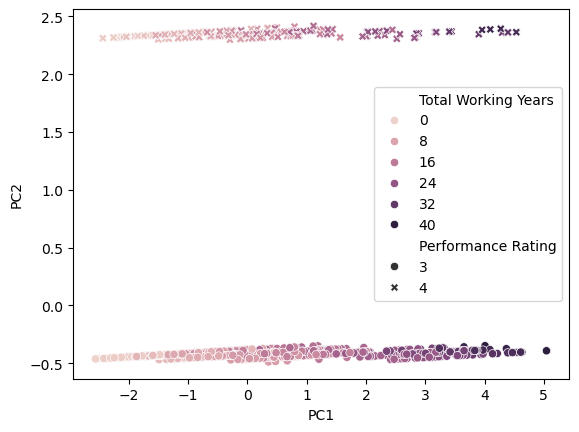

In [15]:
# Plot the data in the principal component space
sns.scatterplot(x='PC1', y='PC2', data=d_f, hue='Total Working Years', style='Performance Rating')
# sns.scatterplot(x='PC1', y='PC2', data=d_f, hue='Performance Rating', style='Total Working Years')

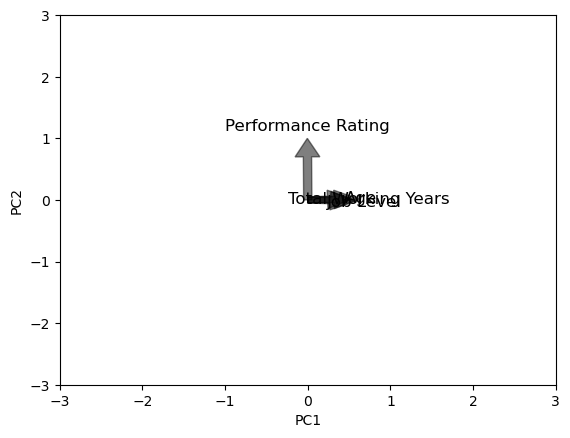

In [16]:
# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    plt.arrow(0, 0, feature[0], feature[1], color='black', alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(feature[0]*1.2, feature[1]*1.2, X.columns[i], color='black', ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()